# Homework Data Visualization

$\textbf{Ubah nama di bawah yaa!}$

- Nama: Aussa Rahmatullah
- Cita-cita semasa kecil: Insinyur

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 27.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.6.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textwrap import wrap
import numpy as np

In [ ]:
filepath = "drive/My Drive/Colab Notebooks/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(filepath)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Example

## Jumlah pelanggan dilihat dari tipe kontrak?

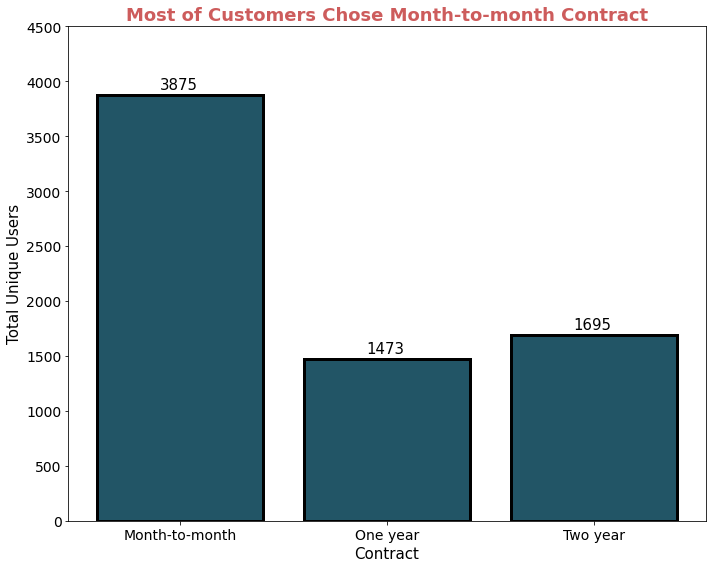

In [ ]:
dfg = df.groupby(['Contract'])['customerID'].nunique().reset_index(name='unique_customers')

x = dfg['Contract']
y = dfg['unique_customers']

plt.figure(figsize=(10,8))
barh = plt.bar(x=x, height=y, data=dfg, 
       color = 'indianred', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

plt.title('Most of Customers Chose Month-to-month Contract',color='indianred',fontsize=18,fontweight='bold')

plt.ylabel('Total Unique Users', fontsize=15) # y axis label
plt.xlabel('Contract', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.1 , y = y[i]+50, s = round(y[i], 2), size = 15) # add data points

plt.ylim(0, 4500)
plt.tight_layout()
# plt.savefig('drive/My Drive/Colab Notebooks/fig/example_1st.png')

## Apakah kebanyakan dari customer pria churn?

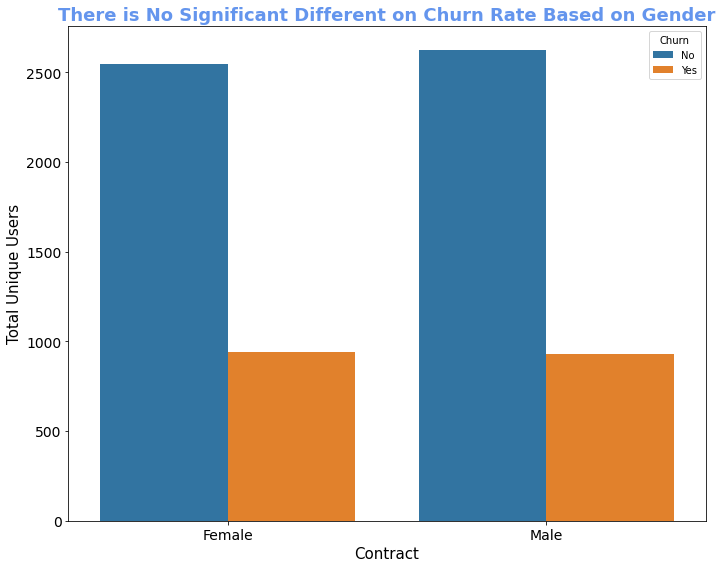

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='gender', hue='Churn', data=df)

plt.title('There is No Significant Different on Churn Rate Based on Gender',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('Total Unique Users', fontsize=15) # y axis label
plt.xlabel('Contract', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

plt.tight_layout()
# plt.savefig('drive/My Drive/Colab Notebooks/fig/example_2nd.png')

# Basic

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

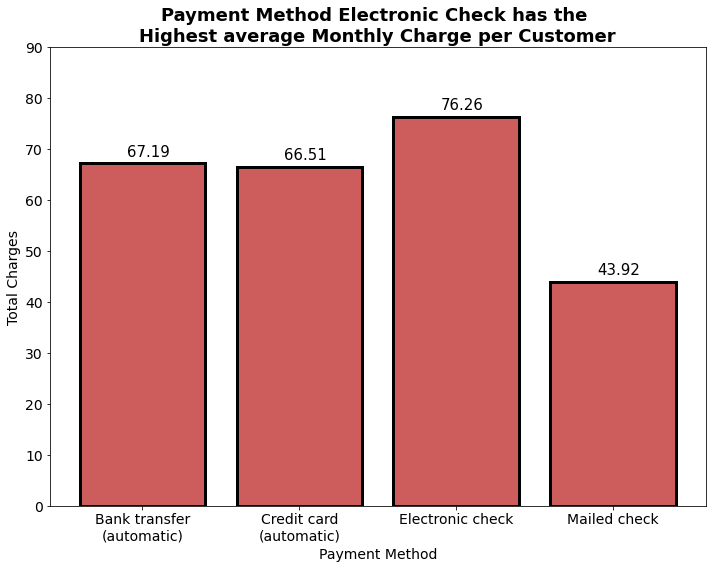

In [ ]:
import matplotlib.ticker as mticker
dfg = df.groupby(['PaymentMethod'])['MonthlyCharges'].mean().reset_index(name='MonthlyCharges')

x = dfg['PaymentMethod']
y = dfg['MonthlyCharges']

fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.bar(x=x, height=y, data=dfg, 
       color = 'indianred', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

ax.set_title('Payment Method Electronic Check has the \nHighest average Monthly Charge per Customer',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Total Charges', fontsize=14) # y axis label
ax.set_xlabel('Payment Method', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i]-0.1 , y = y[i]+1.5, s = round(y[i], 2), size = 15) # add data points

label = list(dfg['PaymentMethod'].unique())
labela = [ '\n'.join(wrap(l, 20)) for l in label]
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels(labela)
    
ax.set_ylim(0, 90)
plt.tight_layout()
plt.savefig('drive/My Drive/Colab Notebooks/fig/basic_first.png')

$\textbf{Dari visualisasi di atas dapat kita simpulkan:}$

- Rata-rata biaya bulanan tertinggi ada pada metode pembayaran electronic check, sedangkan yang paling rendah pada metode pembayaran mailed check


## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 hari
- medium_tenure: User dengan tenure 21 - 40 hari
- high_tenure: User dengan tenure > 41 hari

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

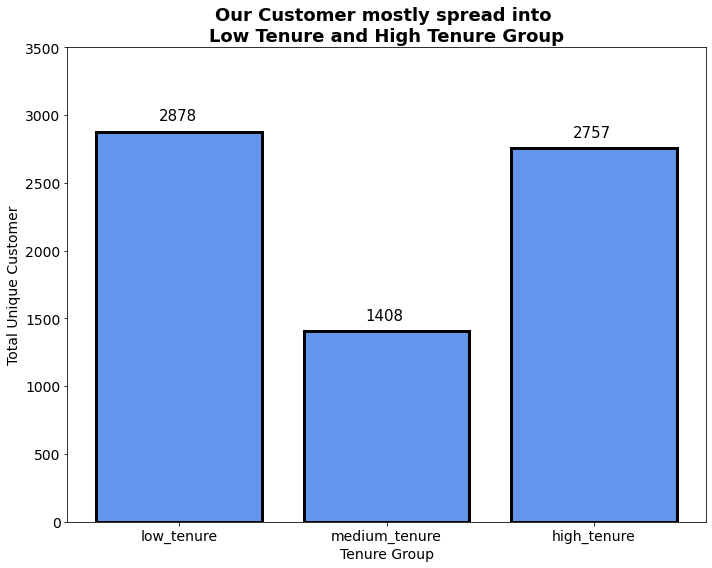

In [ ]:
dfa = df.copy()
dfa['tenure_group'] = pd.cut(dfa['tenure'], bins=[0, 20, 40, max(dfa['tenure'])], 
                             labels=['low_tenure', 'medium_tenure', 'high_tenure'], include_lowest=True)

dfg = dfa.groupby(['tenure_group'])['customerID'].nunique().reset_index(name='unique_customer')

x = dfg['tenure_group']
y = dfg['unique_customer']
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.bar(x=x, height=y, data=dfg, 
       color = 'cornflowerblue', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

ax.set_title('Our Customer mostly spread into \nLow Tenure and High Tenure Group',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Total Unique Customer', fontsize=14) # y axis label
ax.set_xlabel('Tenure Group', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i]-0.1 , y = y[i]+80, s = round(y[i], 2), size = 15) # add data points
    
ax.set_ylim(0, 3500)
plt.tight_layout()
plt.savefig('drive/My Drive/Colab Notebooks/fig/basic_second.png')

$\textbf{Dari visualisasi di atas dapat kita simpulkan:}$

- Kebanyakan Pelanggan Telco memiliki masa berlangganan kurang dari 20 bulan atau lebih dari 41 bulan


## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [ ]:
dfs1 = df.groupby(['SeniorCitizen', 'PhoneService'])['customerID'].nunique().reset_index(name='UniqueCustomer')
dfs2 = df.groupby(['SeniorCitizen'])['customerID'].nunique().reset_index(name='AllUniqueCustomer')

dfs = dfs1.merge(dfs2, how = 'inner', on='SeniorCitizen')
dfs['PercentUniqueCustomer'] = round(dfs['UniqueCustomer']*100.0/dfs['AllUniqueCustomer'], 2) 

dfs.head()

,SeniorCitizen,PhoneService,UniqueCustomer,AllUniqueCustomer,PercentUniqueCustomer
0,0,No,578,5901,9.79
1,0,Yes,5323,5901,90.21
2,1,No,104,1142,9.11
3,1,Yes,1038,1142,90.89


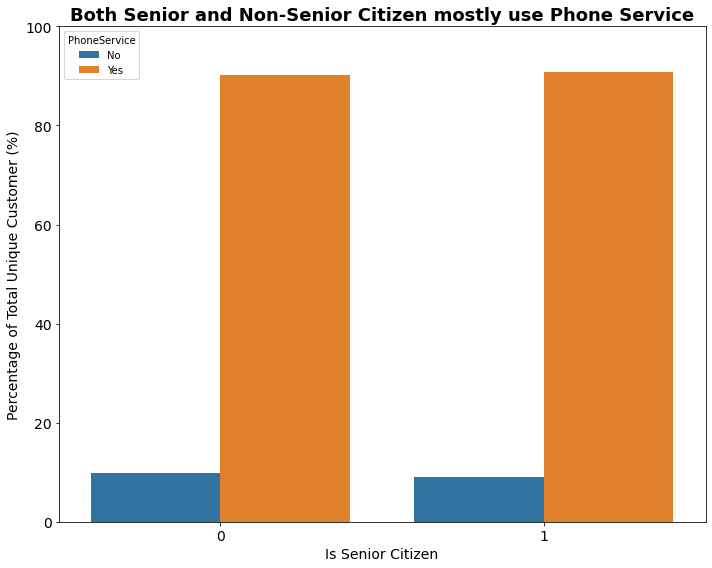

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='SeniorCitizen', y='PercentUniqueCustomer', hue='PhoneService', data=dfs)

plt.title("Both Senior and Non-Senior Citizen mostly use Phone Service",color='black',fontsize=18,fontweight='bold')
plt.ylabel('Percentage of Total Unique Customer (%)', fontsize=14) # y axis label
plt.xlabel('Is Senior Citizen', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.ylim(0,100)

plt.tight_layout()
plt.savefig('drive/My Drive/Colab Notebooks/fig/basic_third.png')

$\textbf{Dari visualisasi di atas dapat kita simpulkan:}$

- Baik warga Senior maupun warga non-senior kebanyakan menggunakan layanan telepon 


## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

<Figure size 720x576 with 0 Axes>

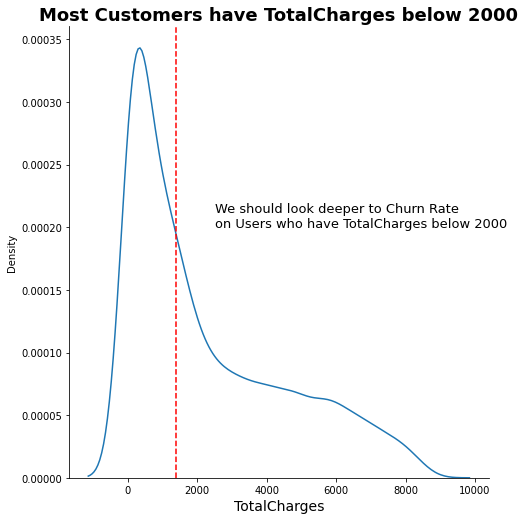

In [ ]:
dfa = df.copy()
dfa['TotalCharges'] = pd.to_numeric(dfa['TotalCharges'], errors='coerce') # merubah data string to numerical
dfa.dropna(subset=['TotalCharges'], inplace=True) # membuang data null

plt.figure(figsize=(10,8))
sns.displot(dfa['TotalCharges'], kind="kde", height=7)

# plt.axvline(2000, linestyle='--', color='red')
plt.axvline(np.quantile(dfa['TotalCharges'], 0.5), linestyle='--', color='red')
plt.title('Most Customers have TotalCharges below 2000', fontsize=18, fontweight='bold')
plt.xlabel('TotalCharges', fontsize=14)
plt.text(2500, 0.0002, s='We should look deeper to Churn Rate \non Users who have TotalCharges below 2000',
        fontsize=13);

In [ ]:
np.quantile(dfa['TotalCharges'], 0.5)

1397.475

$\textbf{Dari visualisasi di atas dapat kita simpulkan:}$

- Kebanyakan dari pelanggan Telco memiliki total biaya dibawah 2000$


# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

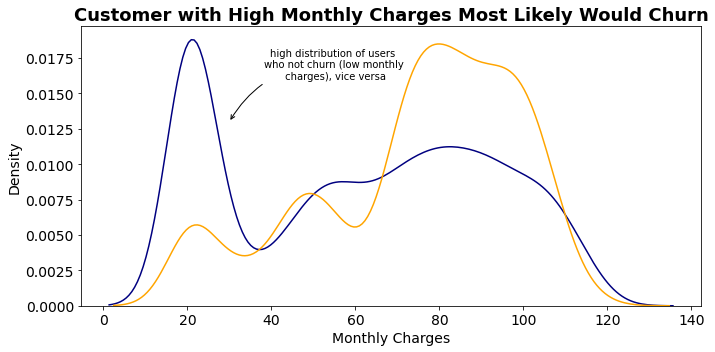

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'].dropna(), color= 'orange', label= 'Churn: Yes', ax=ax)

ax.set_title('Customer with High Monthly Charges Most Likely Would Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Monthly Charges', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

ax.annotate('high distribution of users \nwho not churn (low monthly\n charges), vice versa', 
            xy=(30, 0.013), xytext=(55, 0.016), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center')

plt.tight_layout()
plt.savefig('drive/My Drive/Colab Notebooks/fig/advanced_first.png')

$\textbf{Dari visualisasi di atas dapat kita simpulkan:}$

- Kebanyakan dari pelanggan yang berhenti berlangganan (churn) memiliki biaya bulanan yang tinggi, lebih dari 60$


## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

In [ ]:
dfa = df.copy()
dfa['partner_dependents'] = dfa['Partner']+"-"+dfa['Dependents'] 

dfa['partner_dependents'].value_counts()

No-No      3280
Yes-Yes    1749
Yes-No     1653
No-Yes      361
Name: partner_dependents, dtype: int64

In [ ]:
dfat = dfa.groupby(['partner_dependents', 'Churn'])['customerID'].nunique()

dfat_pr = dfat.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index(name='percentage')
df_viz = dfat_pr.merge(dfat.reset_index(), how = 'inner', on = ['partner_dependents', 'Churn'])
df_viz

,partner_dependents,Churn,percentage,customerID
0,No-No,No,65.762195,2157
1,No-No,Yes,34.237805,1123
2,No-Yes,No,78.670360,284
3,No-Yes,Yes,21.329640,77
4,Yes-No,No,74.591652,1233
5,Yes-No,Yes,25.408348,420
6,Yes-Yes,No,85.763293,1500
7,Yes-Yes,Yes,14.236707,249


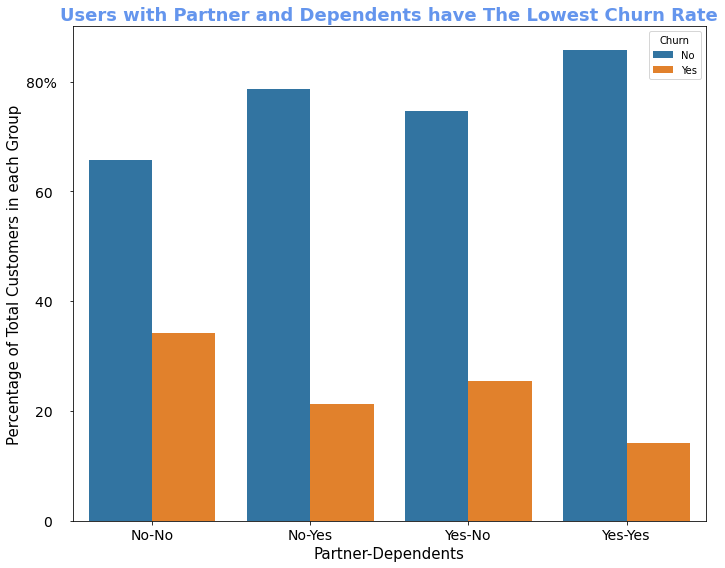

In [ ]:
import matplotlib.ticker as mticker
plt.figure(figsize=(10,8))
axt = sns.barplot(x='partner_dependents', y='percentage', hue='Churn', data=df_viz)

plt.title('Users with Partner and Dependents have The Lowest Churn Rate',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.ylabel('Percentage of Total Customers in each Group', fontsize=15) # y axis label
plt.xlabel('Partner-Dependents', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14);

ticks_loc = axt.get_yticks()
axt.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
axt.set_yticklabels(labels =  ['0   ', '20   ', '40   ', '60   ', '80%  ', 100])

plt.tight_layout()
plt.savefig('drive/My Drive/Colab Notebooks/fig/advanced_2nd.png')

$\textbf{Dari visualisasi di atas dapat kita simpulkan:}$

- Pelanggan yang memiliki pasangan dan tanggungan memiliki tingkat churn yang paling rendah, sedangkan pelanggan yang tidak memiliki keduanya memiliki tingkat churn yang paling tinggi


# Hard

## Buatlah insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut!

Hint:
- Pada saat tenure berapa bulan? 
- Term contract jenis apa yang dipilih oleh pelanggan?
- Status pelanggan seperti apa? Bagaimana persebarannya jika dilihat dari tenure pelanggan?
- Berapa monthly charges pelanggan? Apakah status berpengaruh pada monthly charges pelanggan?

In [ ]:
df_churn = df[df['Churn'] == 'Yes']
df_churn = df_churn.copy()

In [ ]:
def label_status(row):
   if (row['SeniorCitizen'] == 1 or row['Partner'] == 'Yes' or row['Dependents'] == 'Yes') == True:
      return 'Married'
   return 'Single'

df_churn['status'] = df_churn.apply(lambda row: label_status(row), axis=1)

In [ ]:
def label_group_tenure(row):
   if (row['tenure'] <= 12) == True:
      return 'Tenure Below 1 year'
   return 'Tenure Over 1 year'

df_churn['tenure group'] = df_churn.apply(lambda row: label_group_tenure(row), axis=1)

In [ ]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,status,tenure group
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Single,Tenure Below 1 year
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Single,Tenure Below 1 year
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Single,Tenure Below 1 year
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Married,Tenure Over 1 year
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,Single,Tenure Over 1 year


In [ ]:
df_tenure = pd.DataFrame(df_churn.groupby(['tenure'])['Churn'].count()).reset_index()
df_tenure_group = pd.DataFrame(df_churn.groupby(['tenure group'])['Churn'].count()).reset_index()

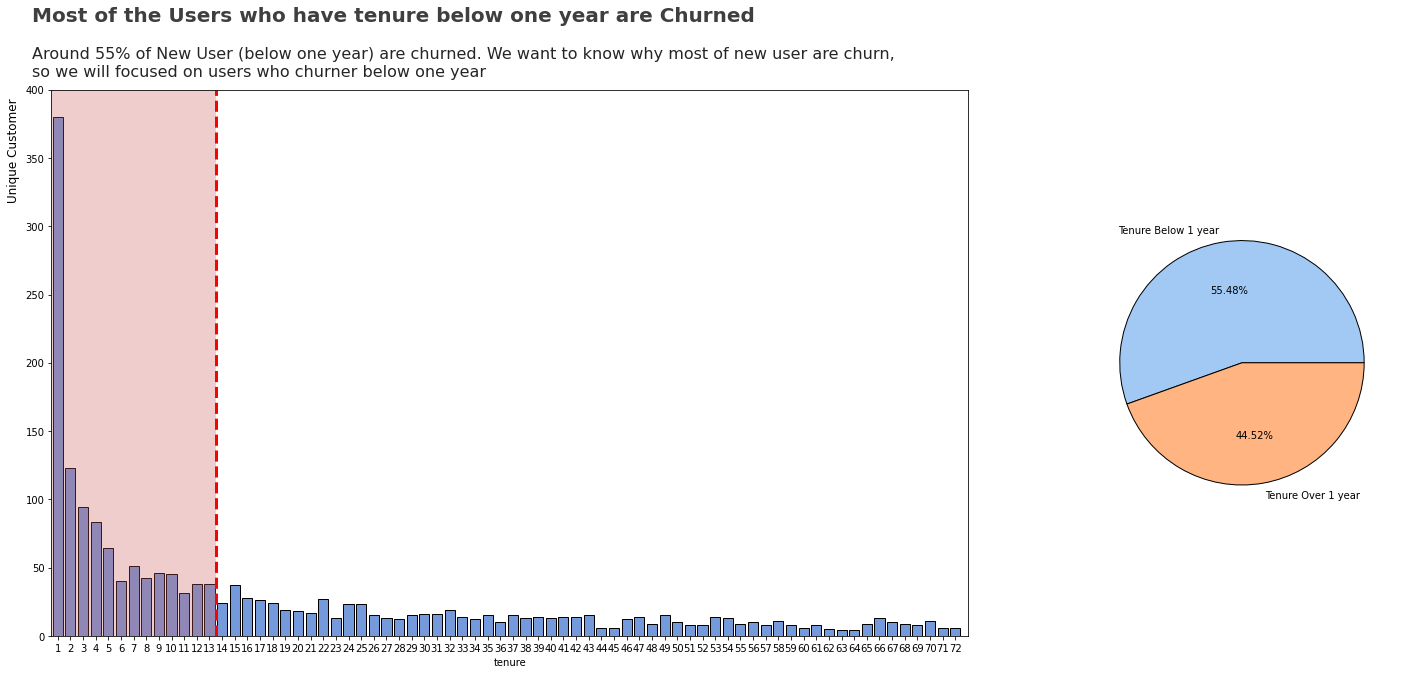

In [ ]:
# Create figure
fig, ax = plt.subplots(1, 2, figsize=(20,10), gridspec_kw={'width_ratios': [3, 1]})

# Plot graph
sns.barplot(ax=ax[0], x="tenure", y="Churn", data=df_tenure, 
            color='cornflowerblue', edgecolor='black')

ax[1].pie(df_tenure_group['Churn'], labels = df_tenure_group['tenure group'], colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"}, autopct='%.2f%%')

ax[0].yaxis.label.set_visible(False)
ax[0].text(-4, 320, s="Unique Customer", fontsize=12, rotation=90)
ax[0].set_ylim(0,400)
ax[0].set_xlim(-0.5,72)
ax[0].stackplot(np.arange(-0.5, 13, 0.5), [[400]], colors=('indianred',), alpha=0.3)
ax[0].axvline(x=12.5, color='red', linestyle='--', linewidth=3)
ax[0].text(x = -2, y = 450, s = "Most of the Users who have tenure below one year are Churned",
               fontsize = 20, weight = 'bold', alpha = .75)
ax[0].text(x = -2, y = 410,
               s = 'Around 55% of New User (below one year) are churned. We want to know why most of new user are churn, \nso we will focused on users who churner below one year',
              fontsize = 16, alpha = .85)

plt.tight_layout(pad=3.0)
plt.savefig('drive/My Drive/Colab Notebooks/fig/hard_1.png');

In [ ]:
df_churn_one_year = df_churn[df_churn['tenure group'] == 'Tenure Below 1 year'].reset_index().drop('index',axis=1)

df_contract = pd.DataFrame(df_churn_one_year.groupby(['Contract', 'status'])['Churn'].count()).reset_index()
df_status = pd.DataFrame(df_churn_one_year.groupby(['status'])['Churn'].count()).reset_index()

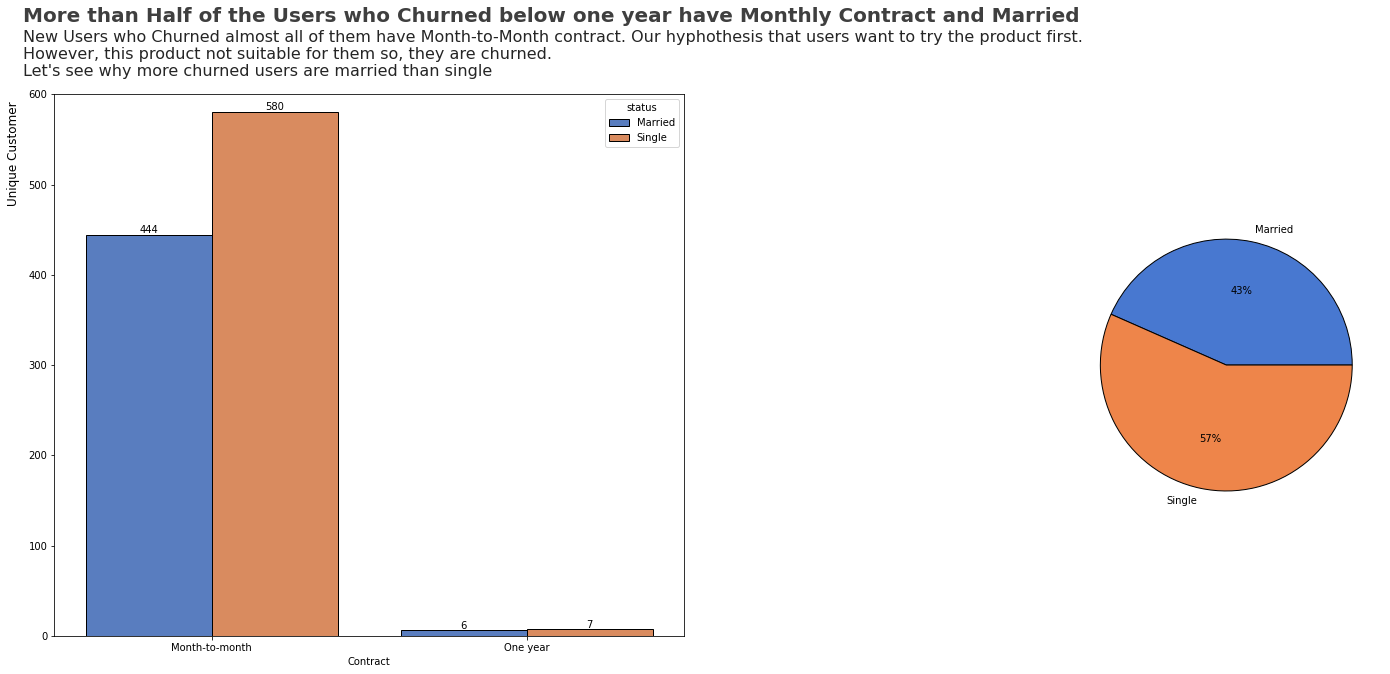

In [ ]:
# Create figure
fig, ax = plt.subplots(1, 2, figsize=(20,10), gridspec_kw={'width_ratios': [2, 1]})

# Plot graph
plt_contract = sns.barplot(ax=ax[0], x="Contract", y="Churn", hue='status', data=df_contract, 
                           palette='muted', edgecolor='black')
for value in plt_contract.containers:
  ax[0].bar_label(value)

ax[1].pie(df_status['Churn'], labels = df_status['status'], colors = sns.color_palette('muted'),
          wedgeprops={"edgecolor":"k"}, autopct='%.0f%%')

ax[0].yaxis.label.set_visible(False)
ax[0].text(-0.65, 480, s="Unique Customer", fontsize=12, rotation=90)
ax[0].set_ylim(0,600)
ax[0].text(x = -0.6, y = 680, s = "More than Half of the Users who Churned below one year have Monthly Contract and Married",
               fontsize = 20, weight = 'bold', alpha = .75)
ax[0].text(x = -0.6, y = 620,
               s = "New Users who Churned almost all of them have Month-to-Month contract. Our hyphothesis that users want to try the product first. \nHowever, this product not suitable for them so, they are churned. \nLet's see why more churned users are married than single",
              fontsize = 16, alpha = .85)

plt.tight_layout(pad=3.0)
plt.savefig('drive/My Drive/Colab Notebooks/fig/hard_2.png');

In [ ]:
single  = df_churn_one_year[df_churn_one_year['status'] == 'Single']['MonthlyCharges']
married = df_churn_one_year[df_churn_one_year['status'] == 'Married']['MonthlyCharges']

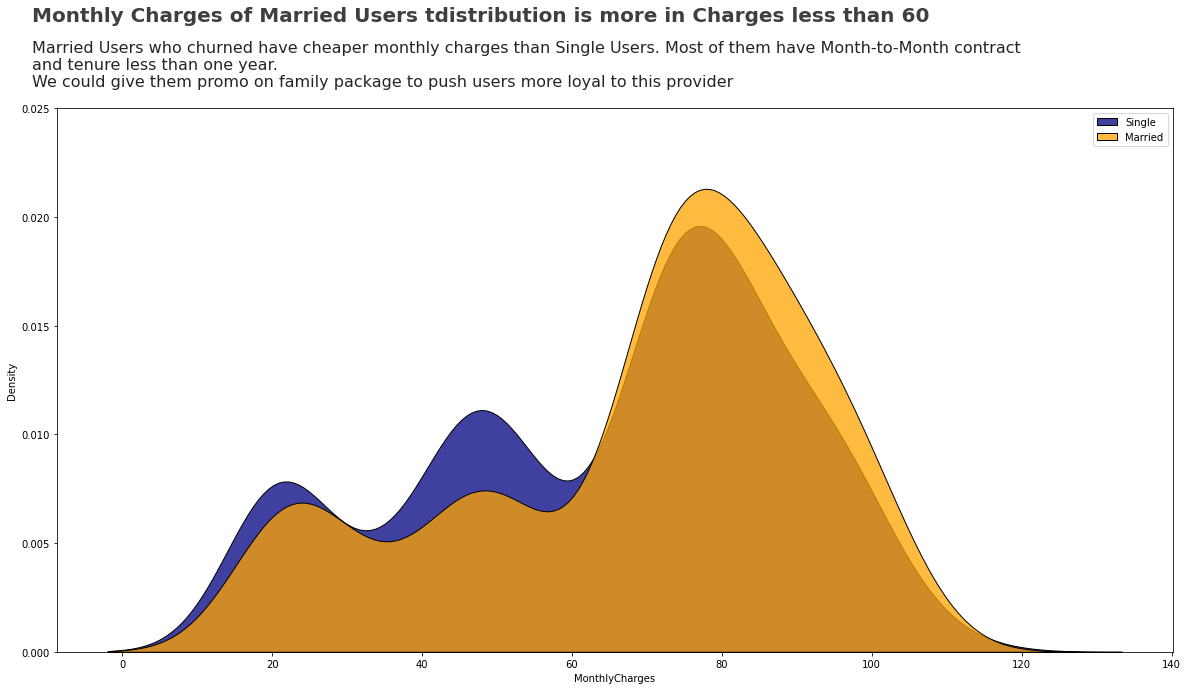

In [ ]:
# Create figure
fig, ax = plt.subplots(figsize=(20,10))

# Plot graph
sns.kdeplot(single.dropna(), color= 'navy', label= 'Single', multiple="stack")
sns.kdeplot(married.dropna(), color= 'orange', label= 'Married', multiple="stack")

ax.set_ylim(0,0.025)
ax.text(x = -12, y = 0.029, s = "Monthly Charges of Married Users tdistribution is more in Charges less than 60",
        fontsize = 20, weight = 'bold', alpha = .75)
ax.text(x = -12, y = 0.026,
        s = 'Married Users who churned have cheaper monthly charges than Single Users. Most of them have Month-to-Month contract \nand tenure less than one year. \nWe could give them promo on family package to push users more loyal to this provider',
        fontsize = 16, alpha = .85)
plt.legend()

plt.savefig('drive/My Drive/Colab Notebooks/fig/hard_3.png');